<a href="https://colab.research.google.com/github/Ku4eruk/ML_trainings/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state = 0)
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)


In [ ]:
scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_x_test = scaler.transform(X_test)


Text(0.5, 1.08, 'Pair plor of the dataser after normalization')

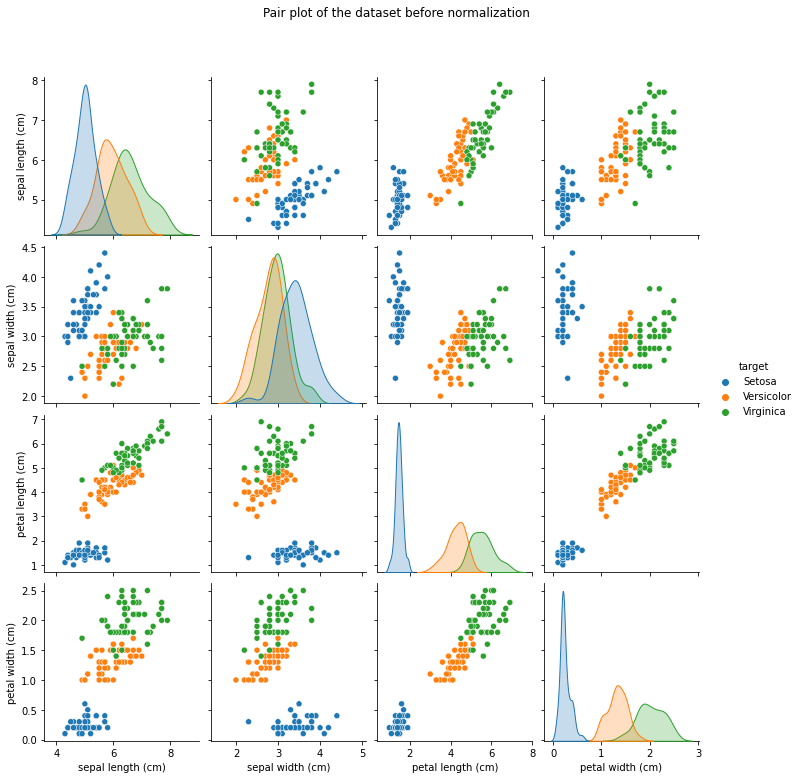

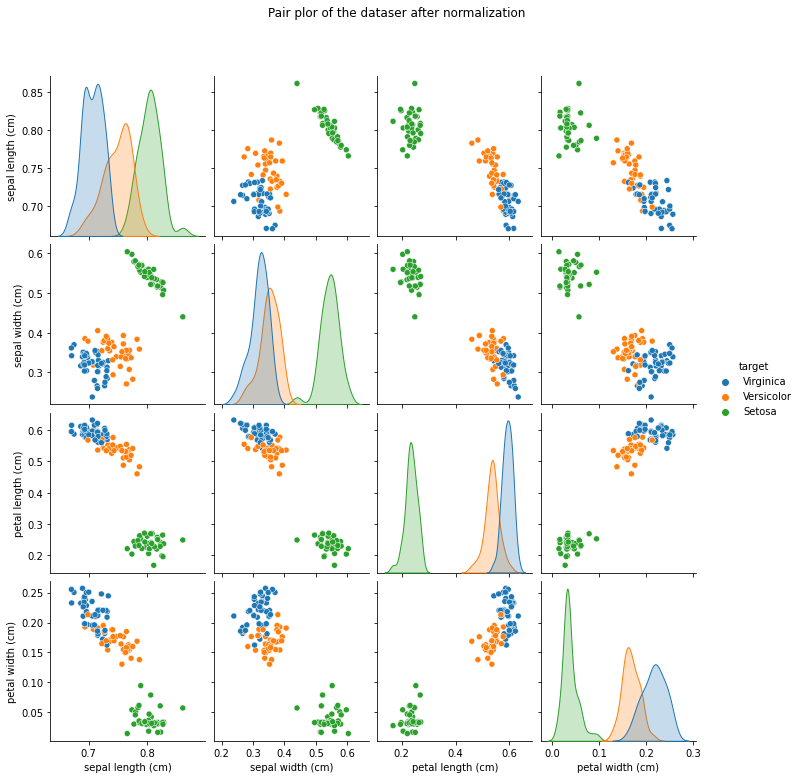

In [ ]:
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}
before = sns.pairplot(iris_df.replace({"target": di}), hue = "target")
before.fig.suptitle("Pair plot of the dataset before normalization", y=1.08)

iris_df2 = pd.DataFrame(data=np.c_[normalized_X_train, Y_train], columns = iris['feature_names'] + ['target'])

after = sns.pairplot(iris_df2.replace({"target": di}), hue = "target")
after.fig.suptitle("Pair plor of the dataser after normalization", y=1.08)

In [ ]:
def distance_ecu(x_train, x_test_point):
  distances = []
  for row in x_train:
    distance = 0
    for element, element_test in zip(row, x_test_point):
      distance += (element - element_test) ** 2
    distances.append(distance ** 0.5)
  distances = pd.DataFrame(data=distances, columns=['dist'])
  return distances

In [ ]:
def nearest_neighbors(distance_point, K):
  df_nearest = distance_point.sort_values(by=['dist'], axis = 0)
  df_nearest = df_nearest[:K]
  return df_nearest

In [ ]:
def voting(df_nearest, y_train):
  counter_vote = Counter(y_train[df_nearest.index])
  y_pred = counter_vote.most_common()[0][0]
  return y_pred
  

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):
  y_pred = []
  for x_t in x_test:
    distance_points = distance_ecu(x_train, x_t)
    df_nearest_points = nearest_neighbors(distance_points, K)
    y_pred_point = voting(df_nearest_points, y_train)
    y_pred.append(y_pred_point)
  return y_pred

In [ ]:
K = 9
y_pred_scratch = KNN_from_scratch(normalized_X_train, Y_train, normalized_x_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [ ]:
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train, Y_train)
y_pred_sklearn = knn.predict(normalized_x_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [ ]:
print(np.array_equal(y_pred_scratch, y_pred_sklearn))

True


In [ ]:
print(f"The accuracy of our implementation is {accuracy_score(Y_test, y_pred_scratch)}")
print(f"The accuracy of our implementation is {accuracy_score(Y_test, y_pred_sklearn)}")

The accuracy of our implementation is 1.0
The accuracy of our implementation is 1.0


In [ ]:
n_splits = 4
kf = KFold(n_splits = n_splits)
accuracy_k = []
k_values = list(range(1, 30, 2))
for k in k_values:
  accuracy_fold = 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in kf.split(normalized_X_train):
    normalized_x_train_fold = normalized_X_train[normalized_x_train_fold_idx]
    y_train_fold = Y_train[normalized_x_train_fold_idx]

    normalized_x_test_fold = normalized_X_train[normalized_x_valid_fold_idx]
    y_valid_fold = Y_train[normalized_x_valid_fold_idx]
    y_pred_fold = KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

    accuracy_fold += accuracy_score(y_pred_fold, y_valid_fold)
  accuracy_k.append(accuracy_fold / n_splits)
print(accuracy_k) 

[0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9583333333333333, 0.9583333333333333, 0.9583333333333334, 0.95, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333]


In [ ]:
print(f'The accuracy for each k values {list(zip(accuracy_k, k_values))}')

The accuracy for each k values [(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [ ]:
print(f'The max accuracy is {np.max(accuracy_k)} with k equals {k_values[np.argmax(accuracy_k)]}')

The max accuracy is 0.9666666666666668 with k equals 1
